import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

In [117]:
#importing the file from 2018
file_path ="https://raw.githubusercontent.com/bpkaur/Exploring-the-Bitcoin-cryptocurrency-market/master/datasets/coinmarketcap_06012018.csv"
#transforming the file to .csv
df = pd.read_csv(file_path, error_bad_lines=False)

In [6]:
#analysing the file
print(df.head())

   Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0     22081300000          16785225       bitcoin    1515230661   
1           1      5221370000       38739144847        ripple    1515230641   
2           2      5705690000          96803840      ethereum    1515230649   
3           3      1569900000          16896225  bitcoin-cash    1515230652   
4           4       428305000       25927070538       cardano    1515230654   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    284909052105  2.100000e+07       Bitcoin              -0.42   
1    119207709132  1.000000e+11        Ripple              -0.26   
2    100115499075           NaN      Ethereum               0.29   
3     44424061657  2.100000e+07  Bitcoin Cash               0.03   
4     25916647856  4.500000e+10       Cardano               0.39   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                5.76              26.04 

In [12]:
#analysing the file
df.describe()

Unnamed: 0  24h_volume_usd  available_supply  last_updated  \
count  100.000000    1.000000e+02      1.000000e+02  1.000000e+02   
mean    49.500000    5.313066e+08      4.397534e+10  1.515231e+09   
std     29.011492    2.354403e+09      2.636906e+11  5.135920e+00   
min      0.000000    3.895190e+05      6.452220e+05  1.515231e+09   
25%     24.750000    1.983332e+07      5.478988e+07  1.515231e+09   
50%     49.500000    4.442795e+07      2.045273e+08  1.515231e+09   
75%     74.250000    1.713828e+08      1.502973e+09  1.515231e+09   
max     99.000000    2.208130e+10      2.509984e+12  1.515231e+09   

       market_cap_usd    max_supply  percent_change_1h  percent_change_24h  \
count    1.000000e+02  2.700000e+01         100.000000          100.000000   
mean     7.608243e+09  3.111140e+11           0.051700           11.169200   
std      3.234455e+10  1.537153e+12           2.592407           34.088136   
min      2.995155e+08  1.890000e+07          -8.850000          -20.830000   
25%      4.613692e+08  6.862612e+07          -1.007500           -3.085000   
50%      7.297321e+08  8.880000e+08           0.150000            0.390000   
75%      1.980319e+09  1.007779e+10           1.270000           11.662500   
max      2.849091e+11  8.000000e+12           6.940000          210.410000   

       percent_change_7d     price_btc     price_usd        rank  total_supply  
count          100.00000  1.000000e+02    100.000000  100.000000  1.000000e+02  
mean           112.12080  1.605252e-02    269.864235   50.500000  1.640679e+11  
std            228.17529  1.013187e-01   1718.394444   29.011492  1.066076e+12  
min            -16.09000  1.000000e-08      0.000230    1.000000  1.000000e+06  
25%             16.17250  4.352250e-05      0.720028   25.750000  8.234886e+07  
50%             53.49500  2.461700e-04      4.072385   50.500000  2.683499e+08  
75%            124.27500  1.547798e-03     25.605125   75.250000  2.039180e+09  
max           2099.78000  1.000000e+00  16973.800000  100.000000  1.000000e+13

In [13]:
#analysing the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          100 non-null    int64  
 1   24h_volume_usd      100 non-null    int64  
 2   available_supply    100 non-null    int64  
 3   id                  100 non-null    object 
 4   last_updated        100 non-null    int64  
 5   market_cap_usd      100 non-null    int64  
 6   max_supply          27 non-null     float64
 7   name                100 non-null    object 
 8   percent_change_1h   100 non-null    float64
 9   percent_change_24h  100 non-null    float64
 10  percent_change_7d   100 non-null    float64
 11  price_btc           100 non-null    float64
 12  price_usd           100 non-null    float64
 13  rank                100 non-null    int64  
 14  symbol              100 non-null    object 
 15  total_supply        100 non-null    int64  
dtypes: float6

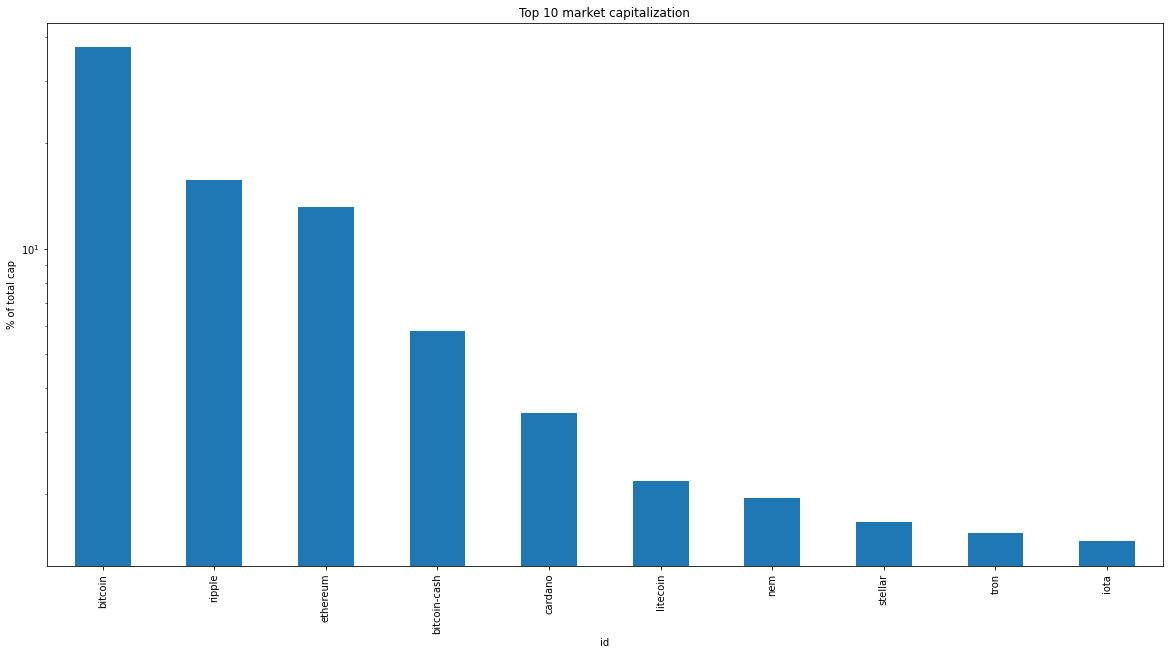

In [14]:
#ploting the top 10 market capitalization
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
cap10 = cap[:10].set_index('id')
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)
ax = cap10.market_cap_perc.plot.bar( title=TOP_CAP_TITLE, figsize=(20,10))
ax.set_ylabel(TOP_CAP_YLABEL);

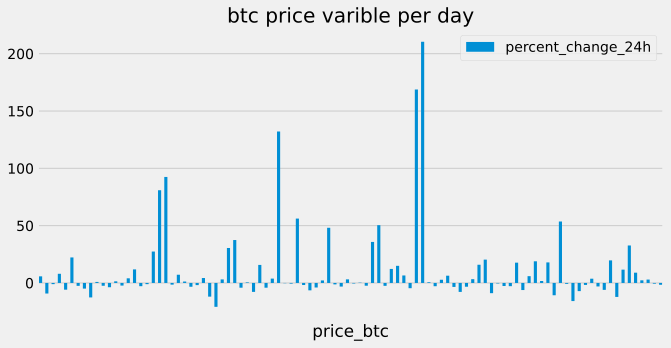

In [35]:
#ploting the variables of BTC per day
df.plot(x='price_btc', y='percent_change_24h', kind='bar', title='btc price varible per day', figsize= (10,5))
plt.xticks([])
plt.show()

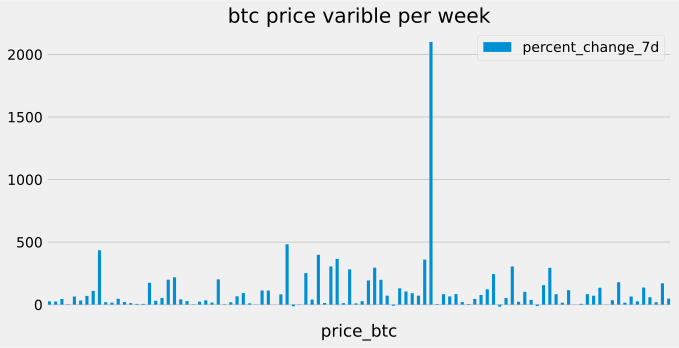

In [34]:
#ploting the variables of BTC per day
df.plot(x='price_btc', y='percent_change_7d', kind='bar', title='btc price varible per week', figsize= (10,5))
plt.xticks([])
plt.show()

<AxesSubplot:title={'center':'price of bitcoin x other cryptocurrencies'}, xlabel='price_btc', ylabel='price_usd'>

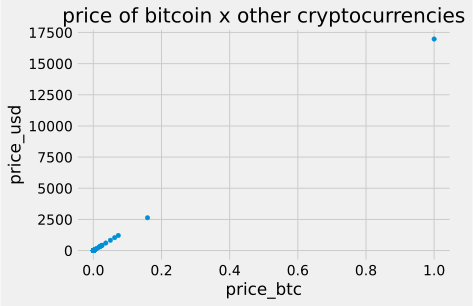

In [32]:
#ploting the difference beteween BTC and other cryptocurrencies 
df.plot(x='price_btc', y='price_usd', kind='scatter',title="price of bitcoin x other cryptocurrencies")

<BarContainer object of 3 artists>

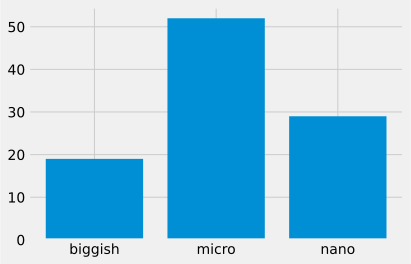

In [58]:
#dividing the cryptocurrencies with their market cap
def capcount(query_string):
    return df.query(query_string).count().id
LABELS = ["biggish", "micro", "nano"]
biggish = capcount('market_cap_usd>3000000000')
micro = capcount('market_cap_usd>500000000 and market_cap_usd<3000000000')
nano =  capcount('market_cap_usd<500000000')
values = [biggish , micro , nano]
plt.bar(range(len(values)) ,values , tick_label=LABELS)

In [163]:
#volatility of the cryptocurrencies 
unstable = df[['id','percent_change_24h','percent_change_7d','percent_change_1h']]
unstable = unstable.set_index('id').dropna()
unstable = unstable.sort_values('percent_change_24h')
print(unstable.head(15))

                   percent_change_24h  percent_change_7d  percent_change_1h
id                                                                         
ardor                          -20.83               2.76              -0.22
tenx                           -15.81               6.55              -1.89
tron                           -12.63             434.36              -1.80
digixdao                       -12.19              15.65               0.65
status                         -11.95             201.88              -1.03
bitcoindark                    -10.74              15.60               0.12
ripple                          -9.23              24.15              -0.26
monacoin                        -8.92             -16.09              -1.49
nxt                             -7.82               4.52               0.84
steem                           -7.79             113.53              -0.84
iconomi                         -7.13              83.82               4.59
experience-p

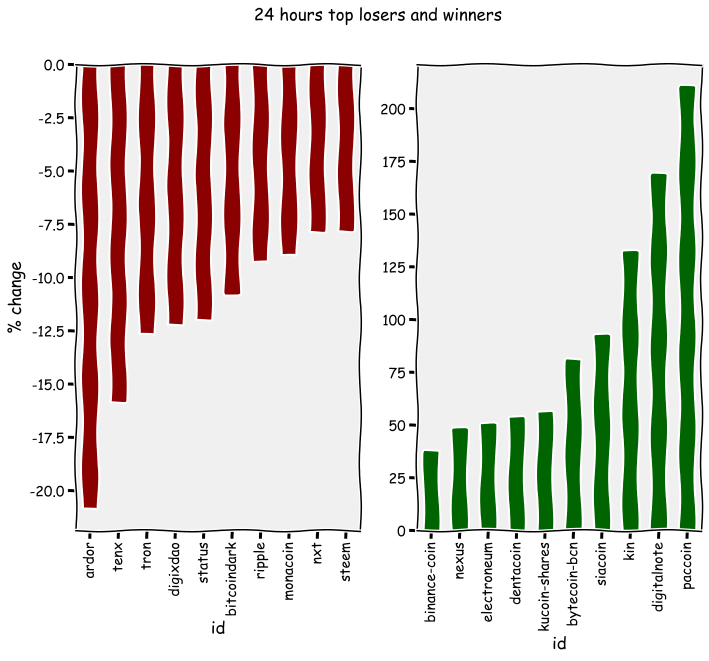

In [174]:
#plotting thevolatility of the cryptocurrencies per day
plt.xkcd()
def top10_subplot(unstable, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
    df = (unstable[:10].plot.bar(color='darkred',ax=axes[0]))
    fig.suptitle(title)
    df.set_ylabel('% change')
    df = (unstable[-10:].plot.bar(color='darkgreen',ax=axes[1]))
    return fig, df
DTITLE = "24 hours top losers and winners"
fig, df = top10_subplot(unstable.percent_change_24h , DTITLE)

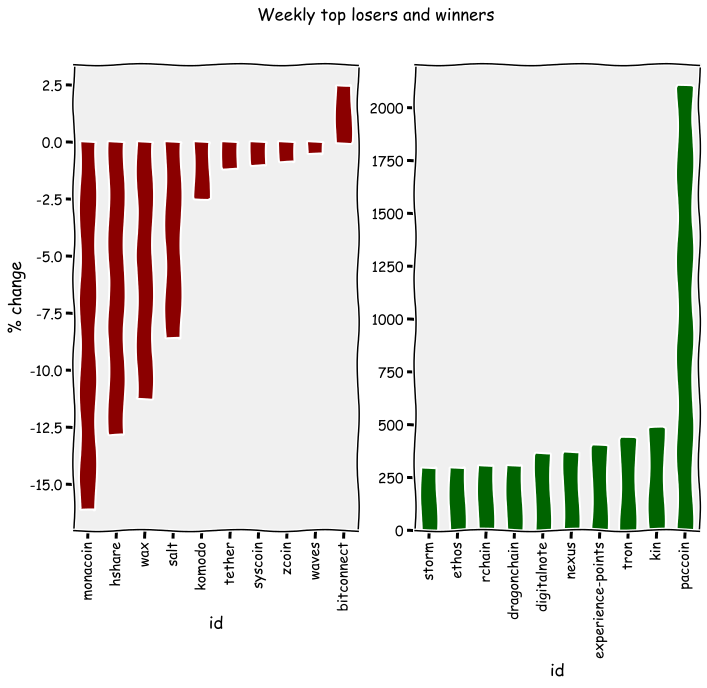

In [177]:
#plotting thevolatility of the cryptocurrencies per week
unstableweek = unstable.sort_values('percent_change_7d', ascending=True)
WTITLE = "Weekly top losers and winners"
fig, df = top10_subplot(unstableweek.percent_change_7d , WTITLE)

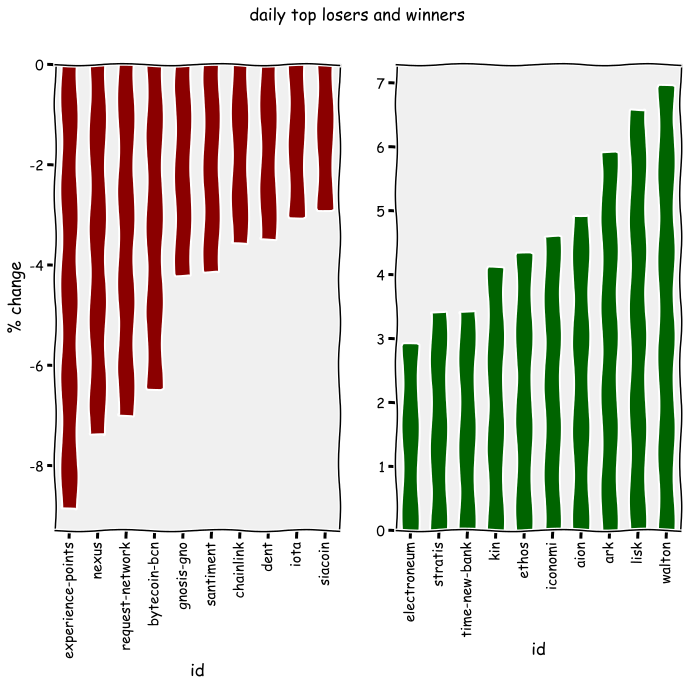

In [180]:
#plotting thevolatility of the cryptocurrencies per hour
unstableday = unstable.sort_values('percent_change_1h', ascending=True)
WTITLE = "top losers and winners each hour"
fig, df = top10_subplot(unstableday.percent_change_1h , WTITLE)